In [1]:
from os import listdir
from os.path import isfile, join
from json import loads
from re import findall,UNICODE
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from labMTsimple.labMTsimple.speedy import LabMT
my_LabMT = LabMT()
from labMTsimple.labMTsimple.storyLab import *
import numpy as np
from bookclass import Book_raw_data
import pickle

import os
sys.path.append('/Users/andyreagan/projects/2014/09-books/database')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import *

In [3]:
version = "P-20K-100K-40dl-200pt"
a = pickle.load(open("../media/figures/SVD/{0}/singular-values.p".format(version),"rb"))
b = pickle.load(open("../media/figures/SVD/{0}-salad/singular-values.p".format(version),"rb"))
print(a[:10])
print(b[:10])

[ 34.48085517  26.80651944  22.26946495  18.31031861  15.04500792
  11.89267442  10.76519599   8.60810136   7.02339897   5.56264075]
[ 7.83789486  6.6214444   5.59845452  4.96360724  4.19560107  3.54550635
  3.04695919  2.61379076  2.15766348  1.79026588]


In [5]:
from matplotlib import rc,rcParams
rc('font', family='sans-serif') 
rc('font', serif='Helvetica Neue')
rc('text', usetex='false')

rc('font', family='serif')
rc('font', family='cmr10')
rc('text', usetex='true')
# this should accomplish the same thing
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{hyperref}'
rcParams['text.latex.unicode'] = True

rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
%matplotlib inline

## First, just look at the singular values

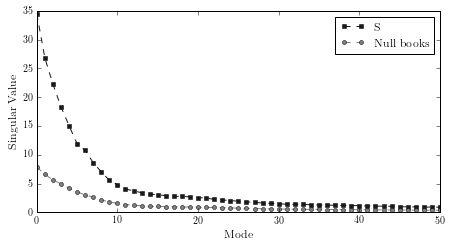

In [7]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot(a,"--sk",color=".1",markersize=4,label="S")
ax.plot(b,"--ok",color=".5",markersize=4,label="Null books")
ax.legend(fontsize=12)
ax.set_xlabel("Mode",fontsize=12)
ax.set_ylabel("Singular Value",fontsize=12)
ax.set_xlim([0,50])
mysavefig("spectrum-comparison.pdf",folder="../media/figures/SVD/{}-salad".format(version))

## Next, normalize them to sum to 1, and look at cumulative

0.102331747262


(0, 1)

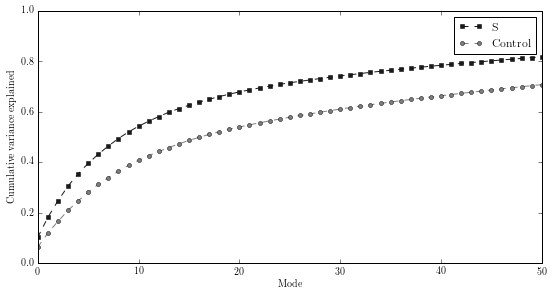

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot(np.cumsum(a)/np.sum(a),"--sk",color=".1",markersize=4,label="S")
ax.plot(np.cumsum(b)/np.sum(b),"--ok",color=".5",markersize=4,label="Control")
print(a[0]/np.sum(a))
ax.legend()
ax.set_xlabel("Mode")
ax.set_ylabel("Cumulative variance explained")
ax.set_xlim([0,50])
ax.set_ylim([0,1])

Not sure that was the right thing to look at, I think I should weight by the first one

See [this link](http://www.cs.toronto.edu/~jepson/csc420/notes/introSVD.pdf)

## Compute Q_p as they did

total variance from each

In [6]:
print(np.sum(a))
print(np.sum(b))
print(np.sum(b)/np.sum(a))

266.926990625
112.326024059
0.42081178751


only half of the "total variance" in the control set

In [7]:
a_rev_cum_sum = [np.sum(a[i:]) for i in range(len(a))]
b_rev_cum_sum = [np.sum(b[i:]) for i in range(len(b))]

(0, 1)

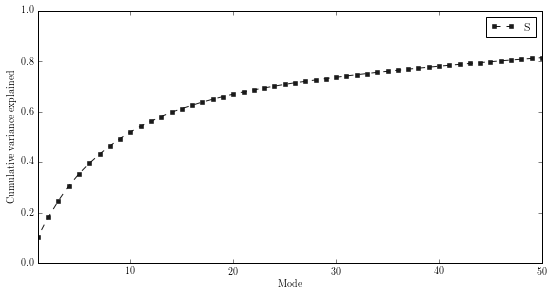

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot((np.sum(a)-a_rev_cum_sum)/np.sum(a),"--sk",color=".1",markersize=4,label="S")
ax.legend()
ax.set_xlabel("Mode")
ax.set_ylabel("Cumulative variance explained")
ax.set_xlim([1,50])
ax.set_ylim([0,1])

yeah, just a strange way to compute the same thing.

both the curves will go to 1, of course.

the control is flatter, and the values themselves are actually smaller.